<a href="https://colab.research.google.com/github/carynpialat/eskom_gather/blob/master/Copy_of_Predict_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The machine Learning pipeline will be as follows

1. Import data
2. Data cleaning and formating
3. Exploratory data analysis
4. Feature engineering and selection
5. Building Models

# Import data & libraries
1. Importing all the necessary libraries
2. Importing all the relavent data 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Train.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Riders.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Test.csv')

## Evaluate Data
1. Checking summary statistics of all the data
2. Checking the percentage of missing data


In [48]:
data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [49]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [50]:
test_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [51]:
data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [52]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [53]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [54]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [55]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [57]:
#Check that attributes in data are all present in test_data

for column in data.columns:
    if column not in test_data.columns:
        print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


## Data preprocessing
1. Make 'User Id' column numeric
2. Make 'Rider Id' column numeric
3. One hot encode 'Personal or Business' columns

In [0]:
df = data.copy()

In [59]:
#Drop columns that have more than 50% missing data

col_names = list(df.columns)
for i in range(len(col_names)):
    if (sum(df[col_names[i]].isna()) / len(df) * 100) > 50:
        print(col_names[i])
        df = df.drop(col_names[i], axis=1)

Precipitation in millimeters


In [0]:
#Given only one vehicle type

df = df.drop('Vehicle Type', axis=1)

In [0]:
#Delete attributes that are absent from test data except the dependent variable

df = df.drop([col for col in df.columns if 'Arrival at Destination' in col], axis=1)

In [0]:
#Make 'User Id' column numeric

df['user_id'] = pd.to_numeric(df['User Id'].str.split('User_Id_', n=1, expand = True)[1])

In [0]:
#One hot encode 'Personal or Business' and 'Platform Type' columns. Drop (n - 1) columns to avoid the dummy variable trap.

df = pd.get_dummies(df, columns=['Personal or Business'], drop_first=True)
df = pd.get_dummies(df, columns=['Platform Type'], drop_first=True)

## Encoding date and time attributes
1. Transform to timestamps
2. Calculate time intervals between all time columns. Aim is to get a numeric value that can be tested for collinearity, 
    may act as a calculated value for the model
3. Check for any negative values (eg. impossible for a confirmation to happen before an order is placed)

4. To be decided: are there other limitations on the time intervals to filter the dataset?

In [0]:
#Transform time columns into 24 hour format

df['Placement - Time'] = pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p')
df['Confirmation - Time'] = pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p')
df['Arrival at Pickup - Time'] = pd.to_datetime(df['Arrival at Pickup - Time'], format='%I:%M:%S %p')
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p')

In [0]:
#Calculate differences between all time columns

df['time_Con - Pl'] = (df['Confirmation - Time'] - df['Placement - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_Arr P - Con'] = (df['Arrival at Pickup - Time'] - df['Confirmation - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_P - Arr P'] = (df['Pickup - Time'] - df['Arrival at Pickup - Time']).astype('timedelta64[s]').astype(np.int64)

In [0]:
#Drop rows that has negative time intervals (eg. not possible for the confirmation to happen before the order is placed)

ls = [col for col in df if col.startswith('time')]

for i in range(len(ls)):
    df = df.drop(df[df[ls[i]] <= 0].index)

In [0]:
#Calculate time in seconds from midnight

df['pl'] = df['Placement - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['con'] = df['Confirmation - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['arr p'] = df['Arrival at Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['p'] = df['Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())

#sin/cos transformation of time values

df['pl_sin'] = df['pl'].apply(lambda x: np.sin(x*(2.*np.pi/86400))) #86400 sec/d
df['pl_cos'] = df['pl'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['con_sin'] = df['con'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['con_cos'] = df['con'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['arr p_sin'] = df['arr p'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['arr p_cos'] = df['arr p'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

df['p_sin'] = df['p'].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
df['p_cos'] = df['p'].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

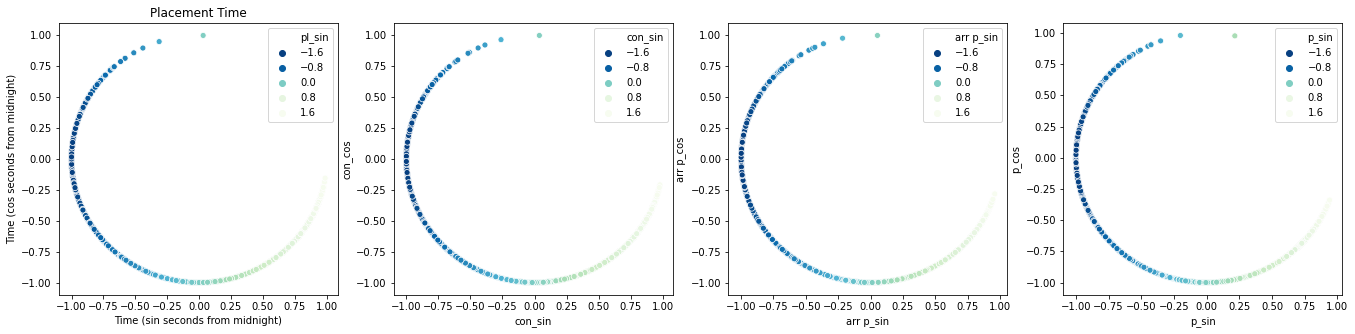

In [68]:
plt.subplot(1, 4, 1)
sns.scatterplot(x=df['pl_sin'], y=df['pl_cos'], hue=df['pl_sin'], palette='GnBu_r')
plt.title('Placement Time')
plt.xlabel('Time (sin seconds from midnight)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 2)
sns.scatterplot(x=df['con_sin'], y=df['con_cos'], hue=df['con_sin'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 3)
sns.scatterplot(x=df['arr p_sin'], y=df['arr p_cos'], hue=df['arr p_sin'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 4)
sns.scatterplot(x=df['p_sin'], y=df['p_cos'], hue=df['p_sin'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

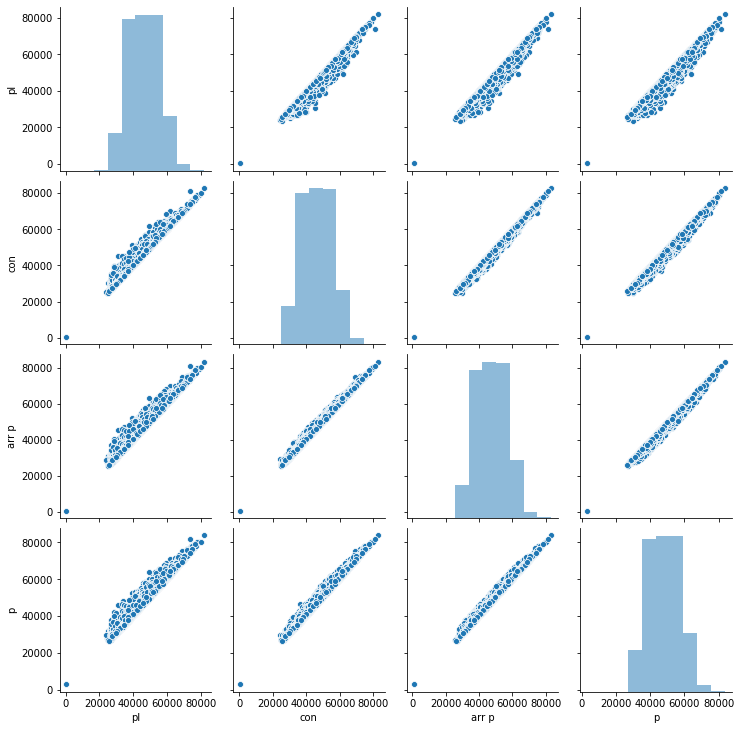

In [69]:
#Investigate relationships between time intervals

sns.pairplot(data=df,
        vars=['pl', 'con', 'arr p', 'p'],
        kind='scatter', palette='GnBu_r', diag_kws={'alpha':0.5})

plt.show()

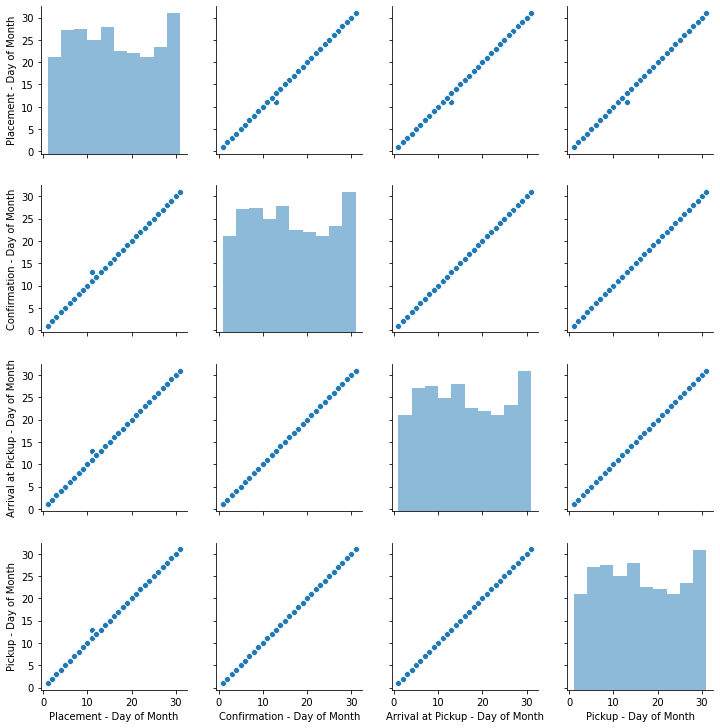

In [70]:
#Investigate relationships between 'Day of Month' columns

sns.pairplot(data=df,
        vars=['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month'],
        kind='scatter', palette='RdBu', diag_kws={'alpha':0.5})

plt.show()

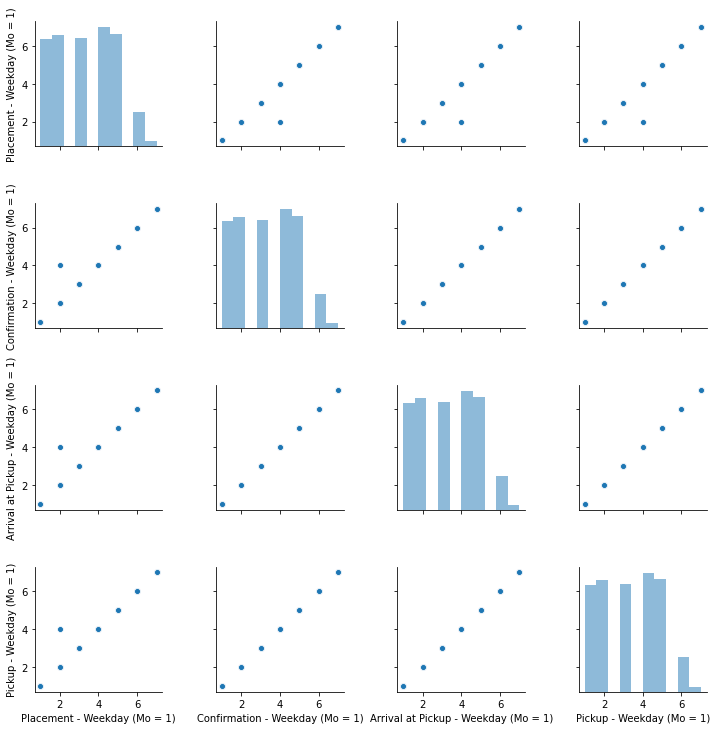

In [71]:
#Investigate relationships between 'Weekday' columns

sns.pairplot(data=df,
        vars=['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)'],
        kind='scatter', palette='GnBu_r', diag_kws={'alpha':.5})

plt.show()

In [0]:
#Drop all but one columns that show multicolinearity
df['weekday'] = df['Pickup - Weekday (Mo = 1)']
df['month_day'] = df['Pickup - Day of Month']

ls = [col for col in df.columns if 'Weekday' in col] + [col for col in df.columns if 'Month' in col]

for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

In [0]:
#sin/cos transform 'Weekday'

df['weekday_sin'] = df['weekday'].apply(lambda x: np.sin(x*(2.*np.pi/7)))
df['weekday_cos'] = df['weekday'].apply(lambda x: np.cos(x*(2.*np.pi/7)))

#sin/cos transform 'Day of Month'

df['day_month_sin'] = df['month_day']. apply(lambda x: np.sin(x*(2.*np.pi/31)))
df['day_month_cos'] = df['month_day']. apply(lambda x: np.cos(x*(2.*np.pi/31)))

# Target value (Time from Pickup to Arrival)
1. Remove outliers by speed (km/h)
2. Boxcox transformation of dependent variable (normal distribution)

In [74]:
#Evaluate shortest times for target value. Longest times might be due to some confounding effect such as traffic.

speed = df.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']]
speed['speed (km/h)'] = 0 #speed['Distance (KM)'] / (speed['Time from Pickup to Destination'] / 3600)
for i in range(len(speed)):
    speed.iloc[i, 2] = speed.iloc[i, 1] / (speed.iloc[i, 0] / 3600)

df['speed (km/h)'] = speed['speed (km/h)']

#Drop rows that have speeds in excess of 110 km/h (max legal driving speed between Uganda and Kenya)

print(len(df[df['speed (km/h)'] > 80]))
df = df.drop(df[df['speed (km/h)'] > 110].index)
df = df.drop('speed (km/h)', axis=1)
print(len(df))

957
20276


In [0]:
from scipy.stats import boxcox
df['y_tf'] = boxcox(df['Time from Pickup to Arrival'])[0]

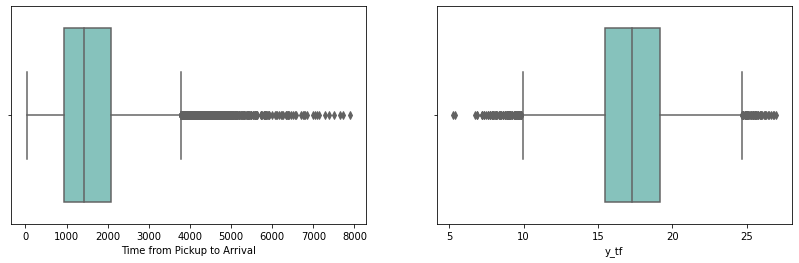

In [76]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

In [0]:
from scipy.stats import zscore

In [78]:
df['y_tf_Z'] = zscore(df['y_tf'])
df = df.drop(df[(df['y_tf_Z'] > 3) | (df['y_tf_Z'] < -3)].index)
df=df.drop('y_tf_Z', axis=1)
print(len(df))

20204


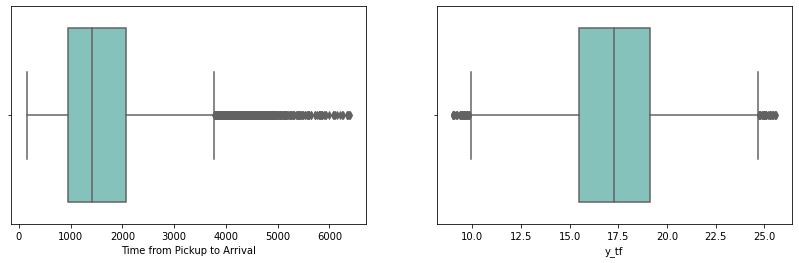

In [79]:
#Boxplot comparison after removing outliers

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

## Encoding latitude and longitude attributes
1. Convert to geohash values, these can then be encoded (Geohash package)
2. Troubleshoot accuracy parameter, need to reverse transform as well to ensure that the same coordinates are returned.
3. Consider UTM transformation (may not be the most accurate because works best with elevation value, small error margin though)

In [0]:
#Provides approximate area sizes: https://www.elastic.co/guide/en/elasticsearch/reference/current/search-aggregations-bucket-geohashgrid-aggregation.html

In [0]:
# %load Geohash.py
"""
Copyright (C) 2008 Leonard Norrgard <leonard.norrgard@gmail.com>
Copyright (C) 2015 Leonard Norrgard <leonard.norrgard@gmail.com>

This file is part of Geohash.

Geohash is free software: you can redistribute it and/or modify it
under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

Geohash is distributed in the hope that it will be useful, but WITHOUT
ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or
FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Affero General Public
License for more details.

You should have received a copy of the GNU Affero General Public
License along with Geohash.  If not, see
<http://www.gnu.org/licenses/>.
"""
from math import log10

#  Note: the alphabet in geohash differs from the common base32
#  alphabet described in IETF's RFC 4648
#  (http://tools.ietf.org/html/rfc4648)
__base32 = '0123456789bcdefghjkmnpqrstuvwxyz'
__decodemap = { }
for i in range(len(__base32)):
    __decodemap[__base32[i]] = i
del i

def decode_exactly(geohash):
    """
    Decode the geohash to its exact values, including the error
    margins of the result.  Returns four float values: latitude,
    longitude, the plus/minus error for latitude (as a positive
    number) and the plus/minus error for longitude (as a positive
    number).
    """
    lat_interval, lon_interval = (-90.0, 90.0), (-180.0, 180.0)
    lat_err, lon_err = 90.0, 180.0
    is_even = True
    for c in geohash:
        cd = __decodemap[c]
        for mask in [16, 8, 4, 2, 1]:
            if is_even: # adds longitude info
                lon_err /= 2
                if cd & mask:
                    lon_interval = ((lon_interval[0]+lon_interval[1])/2, lon_interval[1])
                else:
                    lon_interval = (lon_interval[0], (lon_interval[0]+lon_interval[1])/2)
            else:      # adds latitude info
                lat_err /= 2
                if cd & mask:
                    lat_interval = ((lat_interval[0]+lat_interval[1])/2, lat_interval[1])
                else:
                    lat_interval = (lat_interval[0], (lat_interval[0]+lat_interval[1])/2)
            is_even = not is_even
    lat = (lat_interval[0] + lat_interval[1]) / 2
    lon = (lon_interval[0] + lon_interval[1]) / 2
    return lat, lon, lat_err, lon_err

def decode(geohash):
    """
    Decode geohash, returning two strings with latitude and longitude
    containing only relevant digits and with trailing zeroes removed.
    """
    lat, lon, lat_err, lon_err = decode_exactly(geohash)
    # Format to the number of decimals that are known
    lats = "%.*f" % (max(1, int(round(-log10(lat_err)))) - 1, lat)
    lons = "%.*f" % (max(1, int(round(-log10(lon_err)))) - 1, lon)
    if '.' in lats: lats = lats.rstrip('0')
    if '.' in lons: lons = lons.rstrip('0')
    return lats, lons

def encode(latitude, longitude, precision=12):
    """
    Encode a position given in float arguments latitude, longitude to
    a geohash which will have the character count precision.
    """
    lat_interval, lon_interval = (-90.0, 90.0), (-180.0, 180.0)
    geohash = []
    bits = [ 16, 8, 4, 2, 1 ]
    bit = 0
    ch = 0
    even = True
    while len(geohash) < precision:
        if even:
            mid = (lon_interval[0] + lon_interval[1]) / 2
            if longitude > mid:
                ch |= bits[bit]
                lon_interval = (mid, lon_interval[1])
            else:
                lon_interval = (lon_interval[0], mid)
        else:
            mid = (lat_interval[0] + lat_interval[1]) / 2
            if latitude > mid:
                ch |= bits[bit]
                lat_interval = (mid, lat_interval[1])
            else:
                lat_interval = (lat_interval[0], mid)
        even = not even
        if bit < 4:
            bit += 1
        else:
            geohash += __base32[ch]
            bit = 0
            ch = 0
    return ''.join(geohash)

In [0]:
geohash = df.loc[:, ['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']]
geohash['pickup'] = 0
geohash['dest'] = 0
for i in range(len(geohash)):
    geohash.iloc[i, 4] = encode(geohash.iloc[i, 0], geohash.iloc[i, 1], precision=6)
    geohash.iloc[i, 5] = encode(geohash.iloc[i, 2], geohash.iloc[i, 3], precision=6)

# Make a dictionary of geohash labels

labels = list(set(list(geohash['pickup']) + list(geohash['dest'])))
vals = [i + 1 for i in list(range(0, len(labels)))]
geohash_dict = dict(zip(labels, vals))

#Transform geohash labels using the dictionary
geohash['pickup_label'] = geohash['pickup'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)
geohash['dest_label'] = geohash['dest'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)

#Add to df
df['pickup_geohash'] = geohash['pickup_label']
df['dest_geohash'] = geohash['dest_label']
#df = df.drop(['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long'], axis=1)

## Ranking riders
1. Rank riders by weighted rating value and efficiency

In [0]:
#Rank riders by weighted rating value and efficiency

riders['weighted_rating'] = 0
riders['deliveries_per_day'] = 0
total = sum(riders['No_of_Ratings'])

for i in range(len(riders)):
    riders.iloc[i, 5] = riders.iloc[i, 3] * (riders.iloc[i, 4] / total)
    riders.iloc[i, 6] = riders.iloc[i, 1] / riders.iloc[i, 2]
    
riders = riders.sort_values('weighted_rating', ascending=False).reset_index()
riders['ranking'] = riders.index

In [0]:
#Create merged dataset

df = pd.merge(df, riders, how='left', left_on=['Rider Id'], right_on=['Rider Id'])

#df = df.drop(['Average_Rating', 'No_of_Ratings', 'Rider Id'], axis = 1)

In [85]:
df.head()

,Order No,User Id,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,user_id,Personal or Business_Personal,Platform Type_2,Platform Type_3,Platform Type_4,time_Con - Pl,time_Arr P - Con,time_P - Arr P,pl,con,arr p,p,pl_sin,pl_cos,con_sin,con_cos,arr p_sin,arr p_cos,p_sin,p_cos,weekday,month_day,weekday_sin,weekday_cos,day_month_sin,day_month_cos,y_tf,pickup_geohash,dest_geohash,index,No_Of_Orders,Age,Average_Rating,No_of_Ratings,weighted_rating,deliveries_per_day,ranking
0,Order_No_4211,User_Id_633,1900-01-01 09:35:46,1900-01-01 09:40:10,1900-01-01 10:04:47,1900-01-01 10:27:30,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,633,0,0,1,0,264,1477,1363,34546.0,34810.0,36287.0,37650.0,0.588609,-0.808418,0.572981,-0.819569,0.481817,-0.876272,0.392738,-0.919650,5,9,-0.974928,-0.222521,0.968077,-0.250653,14.479474,310,110,27,1637,1309,13.8,549,0.018440,1.250573,325
1,Order_No_25375,User_Id_2285,1900-01-01 11:16:16,1900-01-01 11:23:21,1900-01-01 11:40:22,1900-01-01 11:44:09,16,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2285,1,0,1,0,425,1021,227,40576.0,41001.0,42022.0,42249.0,0.189667,-0.981849,0.159235,-0.987241,0.085562,-0.996333,0.069104,-0.997609,5,12,-0.974928,-0.222521,0.651372,-0.758758,18.941379,687,686,739,396,339,13.6,69,0.002284,1.168142,612
2,Order_No_1899,User_Id_265,1900-01-01 12:39:25,1900-01-01 12:42:44,1900-01-01 12:49:34,1900-01-01 12:53:03,3,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,265,0,0,1,0,199,410,209,45565.0,45764.0,46174.0,46383.0,-0.171141,-0.985247,-0.185381,-0.982667,-0.214593,-0.976703,-0.229413,-0.973329,2,30,0.974928,-0.222521,-0.201299,0.979530,12.570969,255,110,851,1023,242,12.5,114,0.003468,4.227273,567
3,Order_No_9336,User_Id_1402,1900-01-01 09:25:34,1900-01-01 09:26:05,1900-01-01 09:37:56,1900-01-01 09:43:06,9,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,1402,0,0,1,0,31,711,310,33934.0,33965.0,34676.0,34986.0,0.623993,-0.781430,0.622230,-0.782834,0.580940,-0.813947,0.562444,-0.826835,5,15,-0.974928,-0.222521,0.101168,-0.994869,17.031869,348,104,806,886,283,14.5,113,0.003988,3.130742,550
4,Order_No_27883,User_Id_1737,1900-01-01 09:55:18,1900-01-01 09:56:18,1900-01-01 10:03:53,1900-01-01 10:05:23,9,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1737,1,0,0,0,60,455,90,35718.0,35778.0,36233.0,36323.0,0.517654,-0.855590,0.513916,-0.857841,0.485255,-0.874373,0.479522,-0.877530,1,13,0.781831,0.623490,0.485302,-0.874347,16.577105,22,686,159,2311,872,14.1,533,0.018291,2.650229,327


In [0]:
df = df.set_index('Order No')

## Temperature
1. Calculate mean temperature per hour
2. Fill missing values with mean temperiture values

In [0]:
#Calculate mean temperature per hour

temp_adj = df.loc[:, ['Temperature', 'Placement - Time']]
temp_adj['hour'] = temp_adj['Placement - Time'].apply(lambda x: x.hour)
mean_temps = temp_adj.drop(temp_adj[temp_adj['Temperature'].isna()].index)
mean_temps = mean_temps.groupby(['hour'], as_index=False).mean()

#Replace nan Temperatures with mean per hour

a = temp_adj['Temperature'].isna()

for i in range(len(a)):
    if a.iloc[i] == True:
        temp_adj.iloc[i, 0] = mean_temps.loc[mean_temps['hour'] == temp_adj.iloc[i, 2], 'Temperature'].values[0]

df['temp_adj'] = temp_adj['Temperature']
df = df.drop('Temperature', axis=1)

In [0]:
#Move dependent variable to the end

df['Time from Pickup to Arrival'] = df.pop('Time from Pickup to Arrival')
df['y_tf'] = df.pop('y_tf')

In [0]:
#Drop time columns

ls = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']
for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

In [90]:
df = df.set_index('Order No')
df.head()

KeyError: ignored

In [0]:
df.to_csv('data_merge.csv')
#data_train.to_csv('data_train.csv')

In [0]:
df_train = df.copy()

In [0]:
### TEST COLUMNS TO REMOVE FROM df_train
df_train = df.drop(['user_id','User Id', 'Placement - Time','Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long', 'Rider Id', 'pl', 'con','arr p', 'p','pl_sin',
       'pl_cos', 'con_sin', 'con_cos', 'arr p_sin', 'arr p_cos', 'p_sin', 'p_cos', 'weekday_sin', 'weekday_cos', 'day_month_sin', 'day_month_cos','index','No_Of_Orders','Age','Average_Rating', 'weighted_rating','No_of_Ratings','y_tf'], axis=1)
df_train.head(10)


In [0]:
#Checking the correlation of the numerical data in df set

sns.heatmap(df_train.corr())

# Modeling 

## Split data set into train and validation
Split the training set into training and validation sets (for simplicity, this way we don't need to submit on Zindi every test run)

In [0]:
#Create the matrix of features.
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Multiple Linear

In [0]:
#Training the Multiple Linear Regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [0]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Polynomial

In [0]:
#Training the Polynomial Linear Regression model on the Training set

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

In [0]:
#Predicting the test set results

y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

## SVR

In [0]:
y_train_2 = np.reshape(y_train,(len(y_train), 1))

In [0]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_2 = sc_X.fit_transform(X_train)
y_train_2 = sc_y.fit_transform(y_train_2)

In [0]:
#Training the SVR model on the Training set

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_2, y_train_2)

In [0]:
#Predicting the test set results

y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Decision Tree Regression

In [0]:
#Training the Decision Tree Regression model on the Training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

In [0]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Random Forest Regression

In [0]:
#Training the Random Forest Regression model on the Training set

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

In [0]:
#Predicting the test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [0]:
#Evaluating the model performance

r2_score(y_test, y_pred)

In [0]:
#Evaluating the model performance

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Feature scalling


In [0]:
#Outliers Overview for numeric features
plt.figure(figsize=(20, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(df_train))
plt.show()

In [0]:
#Freature scaling all variables except the hot encoded attribute (Bussiness)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 1:] = sc.fit_transform(X_train[:, 1:])
X_test[:, 1:] = sc.transform(X_test[:, 1:])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_sc = df_train.copy()
df_train_sc = sc.fit_transform(df_train_sc['Distance (KM)'])
df_train_sc = sc.fit_transform(df_train_sc['pickup_geohash'])
df_train_sc = sc.fit_transform(df_train_sc['dest_geohash'])
df_train_sc = sc.fit_transform(df_train_sc['temp_adj'])
df_train_sc = sc.fit_transform(df_train_sc['Time from Pickup to Arrival'])
df_train_sc = sc.fit_transform(df_train_sc['ranking'])
df_train_sc = sc.fit_transform(df_train_sc['deliveries_per_day'])

## Training using SVR model
Making use of non-linear gaussian radial basis function (RBF) kernel

In [0]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

### Predicting the Test set results

In [0]:
y_pred = sc.inverse_transform(regressor.predict(sc.transform(X_test)))
y_pred